[[ 1.          0.02        0.          0.        ]
 [ 0.          1.         -0.01577011  0.        ]
 [ 0.          0.          1.          0.02      ]
 [ 0.          0.          0.15356789  1.        ]] [[ 0.        ]
 [ 0.03831418]
 [ 0.        ]
 [-0.02778403]]
[[ 36.89903789  35.90646055 173.1991448   63.27787935]]
double c[] = {36.899038, 35.906461, 173.199145, 63.277879};


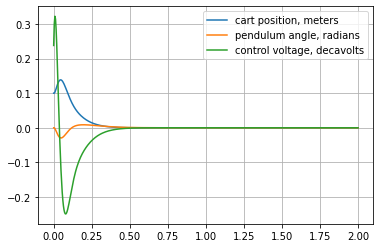

In [9]:
#!/usr/bin/python

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def dlqr(A,B,Q,R):
    """
    Solve the discrete time lqr controller.
    x[k+1] = A x[k] + B u[k]
    cost = sum x[k].T*Q*x[k] + u[k].T*R*u[k]
    """
    # first, solve the ricatti equation
    P = np.matrix(scipy.linalg.solve_discrete_are(A, B, Q, R))
    # compute the LQR gain
    K = np.matrix(scipy.linalg.inv(B.T*P*B+R)*(B.T*P*A))
    return -K

l = 0.591 # rod length is 2l
m = 0.098 
M = .466
dt = .020 # 20 ms
g = 9.8

A = np.matrix([[1, dt, 0, 0],[0,1, -(3*m*g*dt)/(7*M+4*m),0],[0,0,1,dt],[0,0,(3*g*(m+M)*dt)/(l*(7*M+4*m)),1]])
B = np.matrix([[0],[7*dt/(7*M+4*m)],[0],[-3*dt/(l*(7*M+4*m))]])


print (A,B)

Q = np.matrix("1 0 0 0; 0 .0001 0 0 ; 0 0 1 0; 0 0 0 .0001")
R = np.matrix(".0005")


K = dlqr(A,B,Q,R)
print (K)
print ("double c[] = {%f, %f, %f, %f};" % (K[0,0], K[0,1], K[0,2], K[0,3]))

nsteps = 500
time = np.linspace(0, 2, nsteps, endpoint=True)
xk = np.matrix("0.1 ; 0 ; 0 ; 0")

X = []
T = []
U = []

for t in time:
    uk = K*xk
    X.append(xk[0,0])
    T.append(xk[2,0])
    v = xk[1,0]
    force = uk[0,0]
    accel = force/(M+m)
    u = ((1-.404)*v + dt*accel)/.055/10
    U.append(u)
    xk = A*xk + B*uk

plt.plot(time, X, label="cart position, meters")
plt.plot(time, T, label='pendulum angle, radians')
plt.plot(time, U, label='control voltage, decavolts')

plt.legend(loc='upper right')
plt.grid()
plt.show()


In [2]:
xk = np.matrix(".2 ; 0 ; .2 ; 0")


In [9]:
uk

matrix([[0.00045345]])

In [3]:
K = dlqr(A,B,Q,R)
print (K)

[[34.35661658 24.71339086 89.5450231  18.7847591 ]]


In [4]:
uk = K * xk
uk

matrix([[24.78032794]])

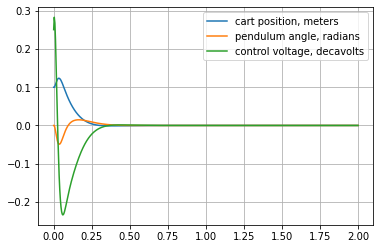

In [5]:
nsteps = 500
time = np.linspace(0, 2, nsteps, endpoint=True)
xk = np.matrix("0.1 ; 0 ; 0 ; 0")

X = []
T = []
U = []

for t in time:
    uk = K*xk
    X.append(xk[0,0])
    T.append(xk[2,0])
    v = xk[1,0]
    force = uk[0,0]
    accel = force/(M+m)
    u = ((1-.404)*v + dt*accel)/.055/10
    U.append(u)
    xk = A*xk + B*uk

plt.plot(time, X, label="cart position, meters")
plt.plot(time, T, label='pendulum angle, radians')
plt.plot(time, U, label='control voltage, decavolts')

plt.legend(loc='upper right')
plt.grid()
plt.show()


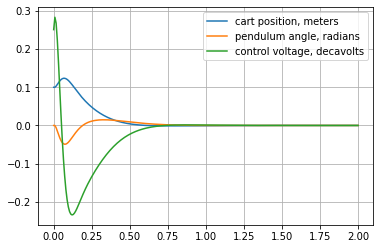

In [15]:
nsteps = 250
time = np.linspace(0, 2, nsteps, endpoint=True)
xk = np.matrix("0.1 ; 0 ; 0 ; 0")

X = []
T = []
U = []

for t in time:
    uk = K*xk
    X.append(xk[0,0])
    T.append(xk[2,0])
    v = xk[1,0]
    force = uk[0,0]
    accel = force/(M+m)
    u = ((1-.404)*v + dt*accel)/.055/10
    U.append(u)
    xk = A*xk + B*uk

plt.plot(time, X, label="cart position, meters")
plt.plot(time, T, label='pendulum angle, radians')
plt.plot(time, U, label='control voltage, decavolts')

plt.legend(loc='upper right')
plt.grid()
plt.show()


In [10]:
(2*l)*(6**2)*(3.14/4)*7856 * (10**(-9))

0.09768464639999999

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([70, 100, 300, 500])
y = np.array([3873 / (1955444 / 21000000), 7679 / (1955444 / 21000000), 718 / (99630 / 21000000), 3722 / (197305 / 21000000)])

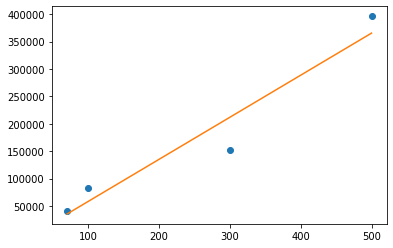

In [44]:
plt.plot(x, y, 'o')
plt.plot(x, y_hat)

In [41]:
# Для метода наименьших квадратов нам нужно, чтобы X был матрицей,
# в которой первый столбец - единицы, а второй - x координаты точек
X = np.vstack((np.ones(x.shape[0]), x)).T
normal_matrix = np.dot(X.T, X)
moment_matrix = np.dot(X.T, y)
# beta_hat это вектор [перехват, наклон], рассчитываем его в
# в соответствии с формулой.
beta_hat = np.dot(np.linalg.inv(normal_matrix), moment_matrix)
intercept = beta_hat[0]
slope = beta_hat[1]
# Теперь, когда мы знаем параметры прямой, мы можем
# легко вычислить y координаты точек на прямой.
y_hat = intercept + slope * x
# Соберем x и y в единую матрицу, которую мы собираемся вернуть
# в качестве результата.
points_hat = np.vstack((x, y_hat)).T

In [42]:
intercept

-18096.638511900557

In [43]:
slope

766.9426925776593